In [11]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load your dataset
df = pd.read_csv('/Users/jawadzaarif7/Desktop/38157/500 rows final.csv')

# Select only quantitative columns
quantitative_cols = ['Age', 'Monthly Income', 'Number of Promotions', 'Years at Company']
df_quant = df[quantitative_cols].dropna()  # Drop rows with missing values

# Rename columns to remove spaces
df_quant = df_quant.rename(columns={
    'Monthly Income': 'Monthly_Income',
    'Number of Promotions': 'Number_of_Promotions',
    'Years at Company': 'Years_at_Company'
})

# Create a formula for the regression model
formula = 'Years_at_Company ~ Age + Monthly_Income + Number_of_Promotions'

# Fit the regression model using the formula
model = smf.ols(formula=formula, data=df_quant).fit()

# Calculate VIF scores
X_vif = df_quant[['Age', 'Monthly_Income', 'Number_of_Promotions']]
X_vif = sm.add_constant(X_vif)  # Add constant for intercept
vif_data = pd.DataFrame({
    "Variable": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})

# Outputs
# 1. Equation
coefficients = model.params
equation = "Years_at_Company = " + " + ".join([f"{coefficients[name]:.3f}*{name}" for name in coefficients.index])

# 2. R-squared and Adjusted R-squared
r2 = model.rsquared
adj_r2 = model.rsquared_adj

# 3. Durbin-Watson Score
dw_score = sm.stats.durbin_watson(model.resid)

# 4. ANOVA Table
anova_results = sm.stats.anova_lm(model, typ=1)
anova_results_rounded = anova_results.copy()
anova_results_rounded.iloc[:, :-1] = anova_results.iloc[:, :-1].round(3)

# 5. Coefficients Table (with VIF)
coeff_table = pd.DataFrame({
    "Coefficient": model.params.round(3),
    "Standard Error": model.bse.round(3),
    "t-value": model.tvalues.round(3),
    "P>|t|": model.pvalues  # Keep p-values unformatted
})
coeff_table = coeff_table.reset_index().rename(columns={"index": "Variable"})
coeff_table = pd.merge(coeff_table, vif_data, on="Variable", how="left")
coeff_table["VIF"] = coeff_table["VIF"].round(3)

# Save tables to Excel
anova_results_rounded.to_excel("anova_results.xlsx", index=True)
coeff_table.to_excel("coefficients_with_vif.xlsx", index=False)

# 6. Normal Probability Plot (NPP)
residuals = model.resid
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normal Probability Plot (NPP)')
plt.show()

# Print Outputs
print(f"Equation:\n{equation}")
print(f"\nR-squared: {r2:.3f}, Adjusted R-squared: {adj_r2:.3f}")
print(f"\nDurbin-Watson Score: {dw_score:.3f}")
print("\nANOVA Table:")
print(anova_results_rounded)
print("\nCoefficients Table (with VIF):")
print(coeff_table)


Equation:
Years_at_Company = -4.208*Intercept + 0.482*Age + 0.000*Monthly_Income + -0.150*Number_of_Promotions

R-squared: 0.281, Adjusted R-squared: 0.277

Durbin-Watson Score: 1.942

ANOVA Table:
                         df     sum_sq    mean_sq        F        PR(>F)
Age                     1.0  16950.765  16950.765  193.408  2.317581e-37
Monthly_Income          1.0     50.000     50.000    0.570  4.504205e-01
Number_of_Promotions    1.0     10.518     10.518    0.120  7.291711e-01
Residual              496.0  43470.596     87.642      NaN           NaN

Coefficients Table (with VIF):
               Variable  Coefficient  Standard Error  t-value         P>|t|  \
0             Intercept       -4.208           1.988   -2.117  3.477405e-02   
1                   Age        0.482           0.035   13.857  3.841030e-37   
2        Monthly_Income        0.000           0.000    0.744  4.571188e-01   
3  Number_of_Promotions       -0.150           0.432   -0.346  7.291711e-01   

     VIF 

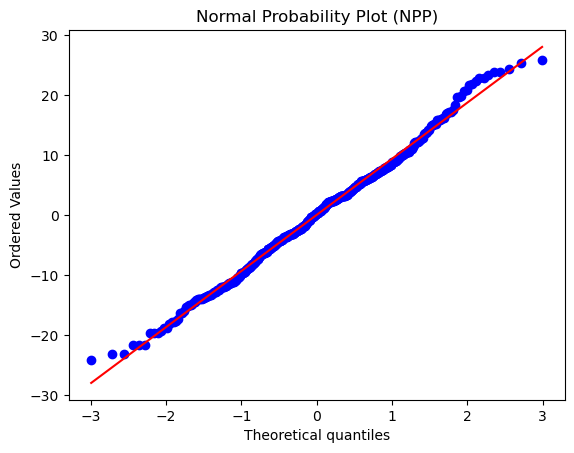

Equation:
Years_at_Company = -3.326*Intercept + 0.483*Age

R-squared: 0.280, Adjusted R-squared: 0.279

Durbin-Watson Score: 1.939

ANOVA Table:
             df     sum_sq    mean_sq        F        PR(>F)
Age         1.0  16950.765  16950.765  193.918  1.834738e-37
Residual  498.0  43531.113     87.412      NaN           NaN

Coefficients Table (with VIF):
    Variable  Coefficient  Standard Error  t-value         P>|t|  VIF
0  Intercept       -3.326           1.370   -2.428  1.552143e-02  NaN
1        Age        0.483           0.035   13.925  1.834738e-37  1.0


In [15]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load your dataset
df = pd.read_csv('/Users/jawadzaarif7/Desktop/38157/500 rows final.csv')

# Select only quantitative columns
quantitative_cols = ['Age', 'Years at Company']
df_quant = df[quantitative_cols].dropna()  # Drop rows with missing values

# Rename columns to remove spaces
df_quant = df_quant.rename(columns={
    'Monthly Income': 'Monthly_Income',
    'Number of Promotions': 'Number_of_Promotions',
    'Years at Company': 'Years_at_Company'
})

# Create a formula for the regression model
formula = 'Years_at_Company ~ Age'

# Fit the regression model using the formula
model = smf.ols(formula=formula, data=df_quant).fit()

# Calculate VIF scores
X_vif = df_quant[['Age']]
X_vif = sm.add_constant(X_vif)  # Add constant for intercept
vif_data = pd.DataFrame({
    "Variable": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})

# Outputs
# 1. Equation
coefficients = model.params
equation = "Years_at_Company = " + " + ".join([f"{coefficients[name]:.3f}*{name}" for name in coefficients.index])

# 2. R-squared and Adjusted R-squared
r2 = model.rsquared
adj_r2 = model.rsquared_adj

# 3. Durbin-Watson Score
dw_score = sm.stats.durbin_watson(model.resid)

# 4. ANOVA Table
anova_results = sm.stats.anova_lm(model, typ=1)
anova_results_rounded = anova_results.copy()
anova_results_rounded.iloc[:, :-1] = anova_results.iloc[:, :-1].round(3)

# 5. Coefficients Table (with VIF)
coeff_table = pd.DataFrame({
    "Coefficient": model.params.round(3),
    "Standard Error": model.bse.round(3),
    "t-value": model.tvalues.round(3),
    "P>|t|": model.pvalues  # Keep p-values unformatted
})
coeff_table = coeff_table.reset_index().rename(columns={"index": "Variable"})
coeff_table = pd.merge(coeff_table, vif_data, on="Variable", how="left")
coeff_table["VIF"] = coeff_table["VIF"].round(3)

# Save tables to Excel
anova_results_rounded.to_excel("better_anova_results.xlsx", index=True)
coeff_table.to_excel("better_coefficients_with_vif.xlsx", index=False)

# 6. Normal Probability Plot (NPP)
residuals = model.resid
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normal Probability Plot (NPP)')
plt.savefig('Normal Probability Plot (NPP).png')
plt.show()

# Print Outputs
print(f"Equation:\n{equation}")
print(f"\nR-squared: {r2:.3f}, Adjusted R-squared: {adj_r2:.3f}")
print(f"\nDurbin-Watson Score: {dw_score:.3f}")
print("\nANOVA Table:")
print(anova_results_rounded)
print("\nCoefficients Table (with VIF):")
print(coeff_table)
